In [2]:
#using Pkg
#Pkg.activate(".")
#Pkg.add("PGFPlotsX")


In [3]:
using Plots; pgfplotsx()
pl  = plot(1:5)
pl2 = plot((1:5).^2, tex_output_standalone = true)
savefig(pl,  "myline.tikz")    # produces a tikzpicture environment that can be included in other documents
savefig(pl2, "latexExamples/myparabola.tex") # produces a standalone document that compiles by itself including preamble

┌ Info: Precompiling PGFPlotsX [8314cec4-20b6-5062-9cdb-752b83310925]
└ @ Base loading.jl:1260
┌ Info: Precompiling Contour [d38c429a-6771-53c6-b99e-75d170b6e991]
└ @ Base loading.jl:1260


In [18]:
gr()
x = 0:0.5:20
y = -1:0.0005:2

f(x, y) = begin
        100(y-x^2)^2 + (x-1) ^ 2 
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)
p1 = contour(x, y, f, fill = true)
p2 = contour(x, y, Z)

pp=plot(p1, p2)
gui()
#savefig(pp,"latexExamples/myfigure.png")

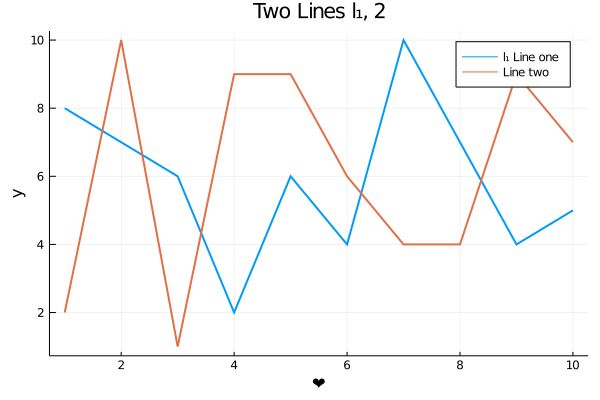

In [38]:
x = 1:10
y = rand(1:10,10,2)
plot(x,y, title="Two Lines l₁, $(x[2])", label=["l₁ Line one" "Line two"], lw=2, xlabel="❤", ylabel="y")

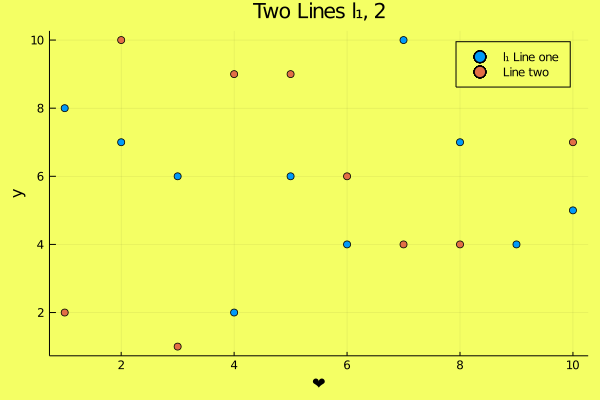

In [48]:
plot(x,y,background_color="rgb(244,266,100)" ,seriestype=scatter,title="Two Lines l₁, $(x[2])", label=["l₁ Line one" "Line two"], lw=2, xlabel="❤", ylabel="y")

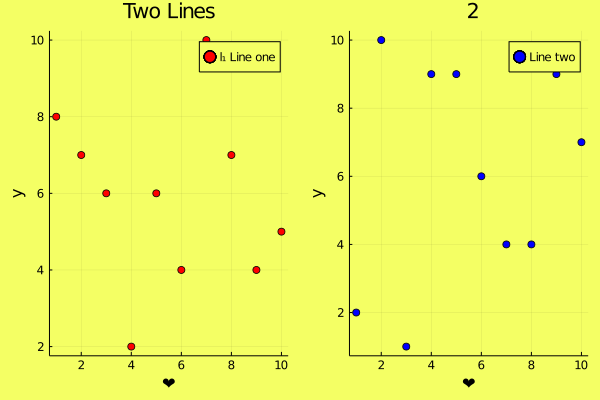

In [52]:
plot(x,y,background_color="rgb(244,266,100)",layout=(1,2),seriestype=scatter,color=[:red :blue],title=["Two Lines" " $(x[2])"], label=["l₁ Line one" "Line two"], lw=2, xlabel="❤", ylabel="y")

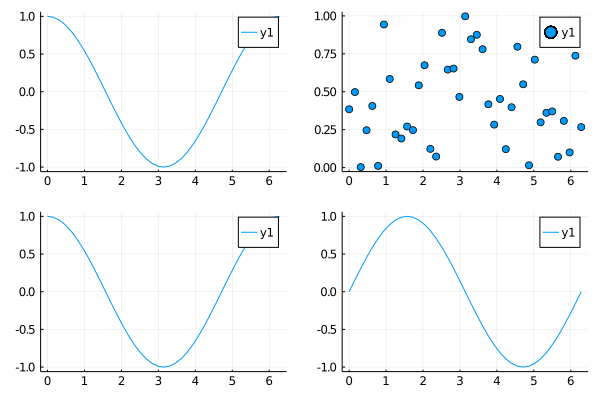

In [91]:
x = 0:π/20:2π
y1 = map(rand([sin,cos]),x)
y2 = rand(length(x))
y3 = map(rand([sin,cos]),x)
y4 = map(rand([sin,cos]),X)
p1= plot(x,y1)
p2= scatter(x,y2)
p3= plot(x,y3)
p4= plot(x,y4)
plot(p1,p2,p3,p4,layout=(2,2))

In [54]:
? Any

search: Any any any! code_warntype ReadOnlyMemoryError @code_warntype isreadonly



```
Any::DataType
```

`Any` is the union of all types. It has the defining property `isa(x, Any) == true` for any `x`. `Any` therefore describes the entire universe of possible values. For example `Integer` is a subset of `Any` that includes `Int`, `Int8`, and other integer types.


In [40]:
plotattr()

Defined Plot attributes are:
background_color, background_color_outside, display_type, dpi, extra_kwargs, extra_plot_kwargs, fontfamily, foreground_color, html_output_format, inset_subplots, layout, link, overwrite_figure, plot_title, pos, show, size, tex_output_standalone, thickness_scaling, warn_on_unsupported, window_title


In [ ]:
plotattr(:Series)

In [ ]:
using Plots, Pkg

In [ ]:
Pkg.activate(".")

In [ ]:
Pkg.add("Colors")

In [ ]:

using Interact
plotly()

In [ ]:
width, height = 700, 300
colors = ["black", "gray", "silver", "maroon", "red", "olive", "yellow", "green", "lime", "teal", "aqua", "navy", "blue", "purple", "fuchsia"]
color(i) = colors[i%length(colors)+1]
ui = @manipulate for nsamples in 1:200,
        sample_step in slider(0.01:0.01:1.0, value=0.1, label="sample step"),
        phase in slider(0:0.1:2pi, value=0.0, label="phase"),
        radii in 0.1:0.1:60
    cxs_unscaled = [i*sample_step + phase for i in 1:nsamples]
    cys = sin.(cxs_unscaled) .* height/3 .+ height/2
    cxs = cxs_unscaled .* width/4pi
    dom"svg:svg[width=$width, height=$height]"(
        (dom"svg:circle[cx=$(cxs[i]), cy=$(cys[i]), r=$radii, fill=$(color(i))]"()
            for i in 1:nsamples)...
    )
end

In [ ]:
plotly()

In [ ]:
using Colors

In [ ]:
@manipulate for ϕ = 0:π/16:4π, f = [sin, cos], both = false
    if both
        plot([θ -> sin(θ + ϕ), θ -> cos(θ + ϕ)], 0, 8)
    else
        plot(θ -> f(θ + ϕ), 0, 8)
    end
end

In [ ]:
@manipulate for n=1:25, g=[:scatter, :path], col=colorant"red"
    plot(rand(n), rand(n), linetype=g, color=col)
end

In [ ]:
Pkg.add("PyPlot")
using PyPlot

In [ ]:
f2,axes = subplots(2,1)
x = range(0, stop=2π, length=1000)
@manipulate for α=1:0.1:3, β=1:0.1:3, γ=1:0.1:3, leg1="a funny plot", leg2=" an even funnier plot" 
    withfig(f2,clear=false) do
        for ax in axes
            ax[:cla]()
        end
        axes[1][:plot](x, sin.(α*x .+ cos.(β*x .+ γ)))
        axes[2][:plot](x, cos.(α*x .+ sin.(β*x .+ γ)))
        axes[1][:legend]([leg1])
        axes[2][:legend]([leg2])
    end
end

# Examples



In [11]:
using Plots, Random
rng = MersenneTwister(1234)
cols= map(x -> x*2+(1-x)*4,rand(10,4))

10×4 Array{Float64,2}:
 2.58725  2.85002  3.91491  3.6025
 3.45695  2.54103  2.2009   2.73471
 3.63103  2.36277  2.36095  3.52869
 2.48602  2.19491  2.82585  2.93345
 2.38461  3.12973  3.43558  3.40269
 3.53751  3.92878  3.11923  3.53564
 3.98346  2.62435  2.03507  2.87785
 2.02532  2.77187  3.26393  2.90934
 2.62677  2.0199   2.17596  3.21095
 3.57217  3.01941  3.77896  2.50713

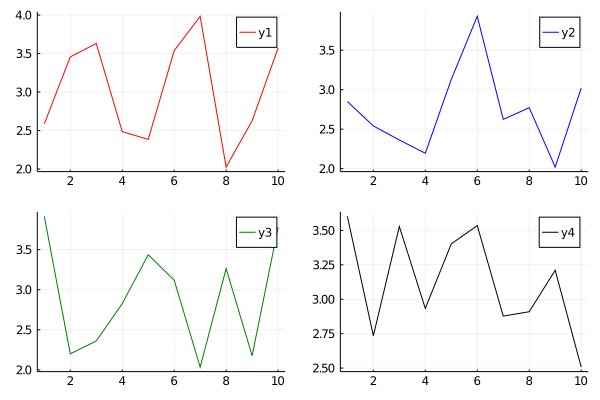

In [16]:

plot(cols, layout=(2,2), color=[:red :blue :green :black])

In [24]:
#import Pkg
Pkg.add("ImageMagick")
using Images

  Resolving package versions...
┌ Warning: julia version requirement for project not satisfied
└ @ nothing nothing:310
   Updating `C:\Users\mmogi\Dropbox\KFUPMWork\Teaching\OldSemesters\Sem201\MATH692\lectures\Project.toml`
  [6218d12a] + ImageMagick v1.1.5
   Updating `C:\Users\mmogi\Dropbox\KFUPMWork\Teaching\OldSemesters\Sem201\MATH692\lectures\Manifest.toml`
  [6218d12a] + ImageMagick v1.1.5
  [c73af94c] + ImageMagick_jll v6.9.10-12+3
  [aacddb02] + JpegTurbo_jll v2.0.1+1
  [89763e89] + Libtiff_jll v4.1.0+0
  [3161d3a3] + Zstd_jll v1.4.5+0


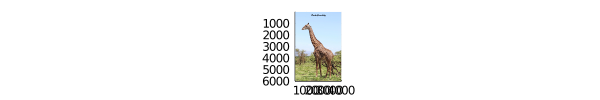

In [40]:
img = load("giraffe_qi6zv6.jpg")
plot(img,size=(600,100))

In [ ]:
plot(1:5, series_keyword = 5)
plot(1:5, colormap_width = 6, extra_kwargs= :subplot)
plot(1:5, extra_kwargs = Dict( :series => Dict( series_keyword => 5 ), :subplot => Dict( colormap_width => 6 ) ) )

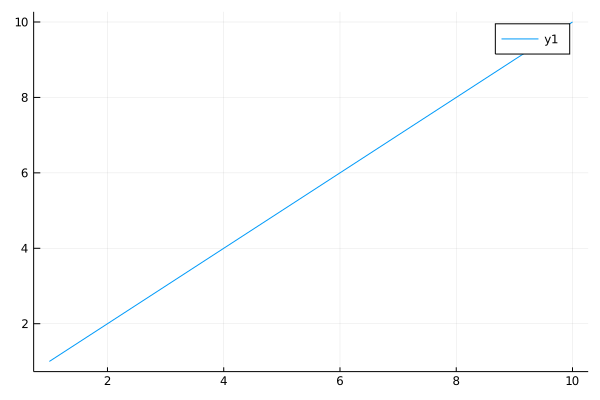

In [34]:
plot(1:10, fmt = :svg)

In [38]:
typeof(plotattr("size"))

size {NTuple{2,Int}}
windowsize, wsize

(width_px, height_px) of the whole Plot
Plot attribute,  default: (600, 400)


Nothing

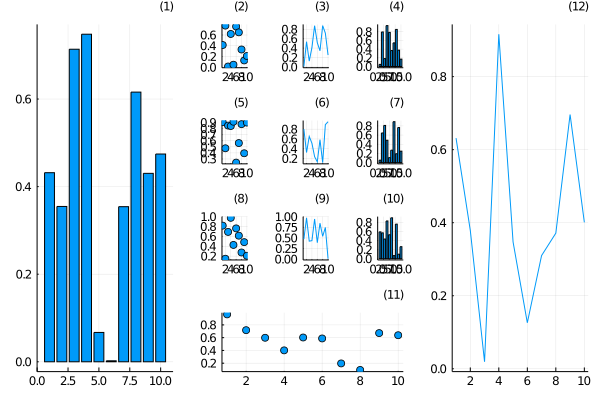

In [115]:
l = @layout [
    a{0.3w} [grid(3,3)
             b{0.2h}  ] c{0.3w}
]
plot(
    rand(10, 12),
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for j in 1:1, i in 1:12], titleloc = :right, titlefont = font(8)
)

┌ Info: Saved animation to 
│   fn = C:\Users\mmogi\Dropbox\KFUPMWork\Teaching\OldSemesters\Sem201\MATH692\lectures\anim_fps15.gif
└ @ Plots C:\Users\mmogi\.julia\packages\Plots\LWw1t\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\mmogi\\Dropbox\\KFUPMWork\\Teaching\\OldSemesters\\Sem201\\MATH692\\lectures\\anim_fps15.gif")
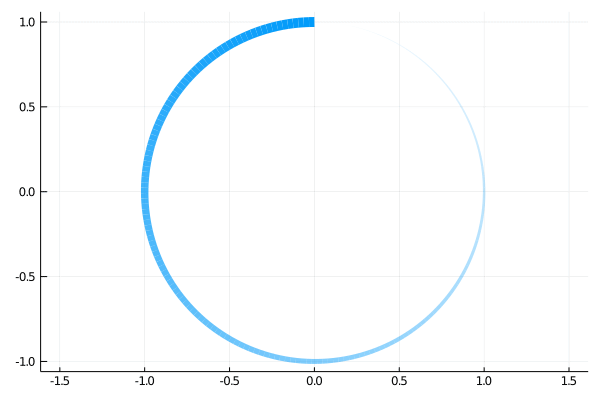

In [117]:
@userplot CirclePlot
@recipe function f(cp::CirclePlot)
    x, y, i = cp.args
    n = length(x)
    inds = circshift(1:n, 1 - i)
    linewidth --> range(0, 10, length = n)
    seriesalpha --> range(0, 1, length = n)
    aspect_ratio --> 1
    label --> false
    x[inds], y[inds]
end

n = 200
t = range(0, 2π, length = n)
x = sin.(t)
y = cos.(t)

anim = @animate for i ∈ 1:n
    circleplot(x, y, i)
end
gif(anim, "anim_fps15.gif", fps = 15)
    